In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import streamlit as st
import pickle
import mlflow

In [2]:
file_location = r"D:\Data science Course\My projects\Amazon_delivery\amazon_delivery.csv"
df = pd.read_csv(file_location)
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [3]:
df.shape

(43739, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [7]:
df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


<Axes: ylabel='Agent_Rating'>

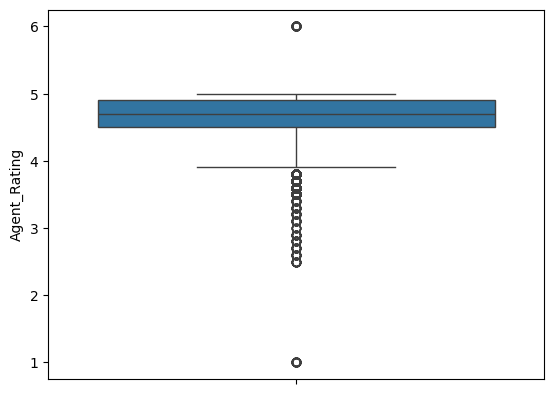

In [8]:
sns.boxplot(df['Agent_Rating'])

In [9]:
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())

In [10]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

<Axes: ylabel='Weather'>

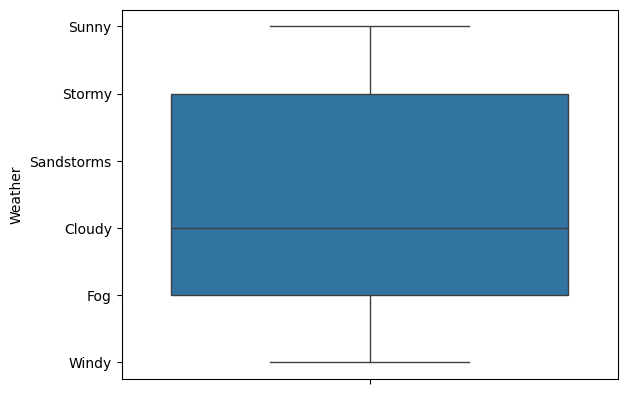

In [11]:
sns.boxplot(df['Weather'])

In [12]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [13]:
df['Weather'].mode()

0    Fog
Name: Weather, dtype: object

In [14]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [15]:
df.isna().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [16]:
df.sample(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
39035,kdoh700633878,30,5.0,22.538999,88.322337,22.618999,88.402337,2022-02-14,20:45:00,21:00:00,Fog,Jam,motorcycle,Metropolitian,265,Shoes
38489,kpuf271429972,28,5.0,17.422819,78.449578,17.442819,78.469578,2022-03-07,09:35:00,09:45:00,Cloudy,Low,scooter,Urban,80,Clothing
26898,ywwk732336801,35,5.0,12.311072,76.654878,12.341072,76.684878,2022-04-03,22:40:00,22:50:00,Fog,Low,motorcycle,Urban,85,Snacks
2146,iqbh856143897,24,4.8,13.058616,80.264151,13.118616,80.324151,2022-03-05,21:00:00,21:05:00,Windy,Jam,scooter,Metropolitian,115,Electronics
26428,gmae739882298,34,4.8,21.175104,72.804342,21.305104,72.934342,2022-03-04,17:45:00,18:00:00,Windy,Medium,motorcycle,Metropolitian,190,Snacks


In [17]:
    lat1 = np.radians(df['Store_Latitude'])
    lon1 = np.radians(df['Store_Longitude'])
    lat2 = np.radians(df['Drop_Latitude'])
    lon2 = np.radians(df['Drop_Longitude'])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    
    # Distance in kilometers
    df['Distance'] = c * r

In [18]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43739 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43739 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
 16  Distance         43739 non-null  float64
dtypes: float64(6

In [20]:
df['Order_Date'].unique()

array(['2022-03-19', '2022-03-25', '2022-04-05', '2022-03-26',
       '2022-03-11', '2022-03-04', '2022-03-14', '2022-03-20',
       '2022-02-12', '2022-02-13', '2022-02-14', '2022-04-02',
       '2022-03-01', '2022-03-16', '2022-02-15', '2022-03-10',
       '2022-03-27', '2022-03-12', '2022-04-01', '2022-03-05',
       '2022-02-11', '2022-03-08', '2022-04-03', '2022-03-30',
       '2022-03-28', '2022-03-18', '2022-04-04', '2022-03-24',
       '2022-03-09', '2022-03-02', '2022-03-13', '2022-03-29',
       '2022-03-31', '2022-03-17', '2022-03-07', '2022-03-15',
       '2022-02-16', '2022-03-03', '2022-02-18', '2022-03-23',
       '2022-02-17', '2022-03-06', '2022-03-21', '2022-04-06'],
      dtype=object)

In [21]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format= '%H:%M:%S', errors='coerce')
df['Order_Hour'] = df['Order_Time'].dt.hour

In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%Y-%m-%d', errors='coerce')
df['Order_Day'] = df['Order_Date'].dt.day_name()

In [23]:
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce')
df['Pickup_Hour'] = df['Pickup_Time'].dt.hour

In [24]:
df.sample(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_Hour,Order_Day,Pickup_Hour
30524,rdkz431060030,36,4.9,22.311358,73.164798,22.381358,73.234798,2022-03-02,1900-01-01 20:35:00,1900-01-01 20:45:00,Sandstorms,Jam,motorcycle,Metropolitian,185,Toys,10.602468,20.0,Wednesday,20
39585,thtf967990162,24,4.7,11.001753,76.986241,11.131753,77.116241,2022-03-14,1900-01-01 23:40:00,1900-01-01 23:55:00,Sandstorms,Low,motorcycle,Urban,95,Electronics,20.253752,23.0,Monday,23
4196,exlm680160754,20,4.7,13.027018,80.254791,13.117018,80.344791,2022-04-02,1900-01-01 20:40:00,1900-01-01 20:50:00,Sandstorms,Jam,motorcycle,Metropolitian,160,Toys,13.970632,20.0,Saturday,20
24462,cdql390015300,31,4.7,12.933284,77.615428,13.063284,77.745428,2022-03-10,1900-01-01 21:20:00,1900-01-01 21:30:00,Cloudy,Jam,motorcycle,Metropolitian,205,Clothing,20.182729,21.0,Thursday,21
30284,yddn081001830,26,4.2,22.725748,75.898497,22.765747,75.938497,2022-03-30,1900-01-01 13:20:00,1900-01-01 13:30:00,Sunny,High,motorcycle,Metropolitian,265,Snacks,6.050406,13.0,Wednesday,13


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43739 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  datetime64[ns]
 9   Pickup_Time      43739 non-null  datetime64[ns]
 10  Weather          43739 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

In [26]:
df.drop(columns=['Order_ID', 'Store_Latitude','Store_Longitude', 'Drop_Latitude','Drop_Longitude','Order_Date','Order_Time','Pickup_Time'], axis= 1 , inplace= True)

In [27]:
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_Hour,Order_Day,Pickup_Hour
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,11.0,Saturday,11
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,19.0,Friday,19
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,8.0,Saturday,8
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,18.0,Tuesday,18
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,13.0,Saturday,13


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agent_Age      43739 non-null  int64  
 1   Agent_Rating   43739 non-null  float64
 2   Weather        43739 non-null  object 
 3   Traffic        43739 non-null  object 
 4   Vehicle        43739 non-null  object 
 5   Area           43739 non-null  object 
 6   Delivery_Time  43739 non-null  int64  
 7   Category       43739 non-null  object 
 8   Distance       43739 non-null  float64
 9   Order_Hour     43648 non-null  float64
 10  Order_Day      43739 non-null  object 
 11  Pickup_Hour    43739 non-null  int32  
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 3.8+ MB


In [29]:
df['Order_Hour'] = df['Order_Hour'].fillna(df['Order_Hour'].median())

In [30]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic', 'Vehicle', 'Area','Category','Order_Day'])

In [31]:
df.head()

,Agent_Age,Agent_Rating,Delivery_Time,Distance,Order_Hour,Pickup_Hour,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,...,Category_Snacks,Category_Sports,Category_Toys,Order_Day_Friday,Order_Day_Monday,Order_Day_Saturday,Order_Day_Sunday,Order_Day_Thursday,Order_Day_Tuesday,Order_Day_Wednesday
0,37,4.9,120,3.025149,11.0,11,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,34,4.5,165,20.183530,19.0,19,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,23,4.4,130,1.552758,8.0,8,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
3,38,4.7,105,7.790401,18.0,18,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,32,4.6,150,6.210138,13.0,13,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [32]:
df.isna().sum()

Agent_Age                0
Agent_Rating             0
Delivery_Time            0
Distance                 0
Order_Hour               0
Pickup_Hour              0
Weather_Cloudy           0
Weather_Fog              0
Weather_Sandstorms       0
Weather_Stormy           0
Weather_Sunny            0
Weather_Windy            0
Traffic_High             0
Traffic_Jam              0
Traffic_Low              0
Traffic_Medium           0
Traffic_NaN              0
Vehicle_bicycle          0
Vehicle_motorcycle       0
Vehicle_scooter          0
Vehicle_van              0
Area_Metropolitian       0
Area_Other               0
Area_Semi-Urban          0
Area_Urban               0
Category_Apparel         0
Category_Books           0
Category_Clothing        0
Category_Cosmetics       0
Category_Electronics     0
Category_Grocery         0
Category_Home            0
Category_Jewelry         0
Category_Kitchen         0
Category_Outdoors        0
Category_Pet Supplies    0
Category_Shoes           0
C

In [33]:
x = df.drop(['Delivery_Time'], axis = 1)
y = df['Delivery_Time']

In [34]:
x.head()

,Agent_Age,Agent_Rating,Distance,Order_Hour,Pickup_Hour,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,...,Category_Snacks,Category_Sports,Category_Toys,Order_Day_Friday,Order_Day_Monday,Order_Day_Saturday,Order_Day_Sunday,Order_Day_Thursday,Order_Day_Tuesday,Order_Day_Wednesday
0,37,4.9,3.025149,11.0,11,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,34,4.5,20.183530,19.0,19,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2,23,4.4,1.552758,8.0,8,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
3,38,4.7,7.790401,18.0,18,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,32,4.6,6.210138,13.0,13,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [35]:
y.head()

0    120
1    165
2    130
3    105
4    150
Name: Delivery_Time, dtype: int64

In [36]:
from scipy.stats import zscore

In [37]:
x_scaled  = x.apply(zscore)

In [38]:
x_scaled.head()

,Agent_Age,Agent_Rating,Distance,Order_Hour,Pickup_Hour,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,...,Category_Snacks,Category_Sports,Category_Toys,Order_Day_Friday,Order_Day_Monday,Order_Day_Saturday,Order_Day_Sunday,Order_Day_Thursday,Order_Day_Tuesday,Order_Day_Wednesday
0,1.278203,0.795595,-0.066478,-1.335544,-1.156619,-0.447146,-0.456062,-0.445562,-0.450308,2.275867,...,-0.260023,-0.257458,-0.260574,-0.427259,-0.396958,2.496632,-0.398962,-0.402459,-0.401960,-0.429017
1,0.762304,-0.400169,-0.034380,0.326291,0.347154,-0.447146,-0.456062,-0.445562,2.220702,-0.439393,...,-0.260023,-0.257458,-0.260574,2.340498,-0.396958,-0.400540,-0.398962,-0.402459,-0.401960,-0.429017
2,-1.129327,-0.699110,-0.069233,-1.958732,-1.720534,-0.447146,-0.456062,2.244355,-0.450308,-0.439393,...,-0.260023,3.884125,-0.260574,-0.427259,-0.396958,2.496632,-0.398962,-0.402459,-0.401960,-0.429017
3,1.450169,0.197713,-0.057564,0.118561,0.159182,-0.447146,-0.456062,-0.445562,-0.450308,2.275867,...,-0.260023,-0.257458,-0.260574,-0.427259,-0.396958,-0.400540,-0.398962,-0.402459,2.487807,-0.429017
4,0.418371,-0.101228,-0.060520,-0.920085,-0.780676,2.236405,-0.456062,-0.445562,-0.450308,-0.439393,...,-0.260023,-0.257458,3.837681,-0.427259,-0.396958,2.496632,-0.398962,-0.402459,-0.401960,-0.429017


In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size = 0.30, random_state= 42)

In [40]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [42]:
print('R2 score:', r2_score(y_train, y_pred))

R2 score: 0.5917659525200258


In [43]:
print('R2 score:', r2_score(y_test, y_pred_test))

R2 score: 0.5844059303452538


In [44]:
x.columns

Index(['Agent_Age', 'Agent_Rating', 'Distance', 'Order_Hour', 'Pickup_Hour',
       'Weather_Cloudy', 'Weather_Fog', 'Weather_Sandstorms', 'Weather_Stormy',
       'Weather_Sunny', 'Weather_Windy', 'Traffic_High ', 'Traffic_Jam ',
       'Traffic_Low ', 'Traffic_Medium ', 'Traffic_NaN ', 'Vehicle_bicycle ',
       'Vehicle_motorcycle ', 'Vehicle_scooter ', 'Vehicle_van',
       'Area_Metropolitian ', 'Area_Other', 'Area_Semi-Urban ', 'Area_Urban ',
       'Category_Apparel', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys', 'Order_Day_Friday', 'Order_Day_Monday',
       'Order_Day_Saturday', 'Order_Day_Sunday', 'Order_Day_Thursday',
       'Order_Day_Tuesday', 'Order_Day_Wednesday'],
      dtype='object'

In [45]:
path_1 = r'D:\Data science Course\My projects\Amazon_delivery\columns.pkl'

In [46]:
###with open(path_1, 'wb') as file:
    pickle.dump(x.columns.tolist(),file)

IndentationError: unexpected indent (2640673016.py, line 2)

In [ ]:
path = r'D:\Data science Course\My projects\Amazon_delivery\model.pkl'

In [ ]:
##with open(path, 'wb') as file:
    pickle.dump(model, file)

In [49]:
with mlflow.start_run(run_name = 'Linear Regression'):
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    Y_pred_test = model.predict(x_test)
    
    mlflow.log_param('model_type', 'LinearRegression')
    
    mlflow.log_metric('r2 score_train', r2_score(y_train, y_pred))
    mlflow.log_metric("mse_train", mean_squared_error(y_train, y_pred))
    mlflow.log_metric('mae_train', mean_absolute_error(y_train, y_pred))

    mlflow.log_metric('r2 score_test', r2_score(y_test, y_pred_test))
    mlflow.log_metric("mse_test", mean_squared_error(y_test, y_pred_test))
    mlflow.log_metric('mae_test', mean_absolute_error(y_test, y_pred_test))
    
    mlflow.sklearn.log_model(model, 'linear_model')



2025/05/04 11:58:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
